## Prepare

In [1]:
import gym 
import robohive
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm
from IPython.display import Image as IPyImage

RoboHive:> Registering Arms Envs
RoboHive:> Registering Myo Envs
RoboHive:> Registering Hand Envs
RoboHive:> Registering Claw Envs
RoboHive:> Registering Appliances Envs
RoboHive:> Registering Multi-Task (2 subtasks) Envs
RoboHive:> Registering FrankaKitchen (FK1) Envs
RoboHive:> Registering Multi-Task (9 subtasks) Envs
RoboHive:> Registering Quadruped Envs
RoboHive:> Registering UR5 Envs


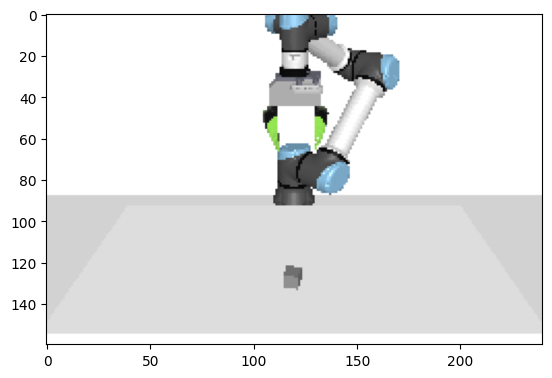

In [3]:
env = gym.make('Ur5Cube-v0')
env.reset();

obs = env.get_obs(update_exteroception=True)
plt.imshow(env.visual_dict['rgb:front:160x240:2d']);

## Replay trajectory

In [5]:
def save_gif(images, path='tmp.gif', width=300, duration=100):
    images[0].save(path, format="GIF", append_images=images, save_all=True, duration=duration, loop=0)
    
    with open(path,'rb') as f:
        return IPyImage(data=f.read(), format='png', width=width)

In [6]:
def get_joints_from_step(step):
    position = step['ee_position']
    orientation = step['ee_orientation']
    joints = env.robot.inverse_kinematics(position, orientation)
    assert joints is not None, 'Failed to move arm to given position'
    joints = np.concatenate([joints, [step['positions'][-2]]])
    return joints

In [7]:
def replay_trajectory(trajectory, camera_name='rgb:front:160x240:2d'):
    images = []
    
    initial_joints = get_joints_from_step(trajectory[0])
    for _ in range(100):
        env.step(initial_joints)
        
    for step in tqdm(trajectory):
        joints = get_joints_from_step(step)
        for _ in range(1):
            env.step(joints)
            
        env.get_obs(update_exteroception=True)
        
        image = env.visual_dict[camera_name]
        images.append(Image.fromarray(image))
        
    return {
        'images': images,
    }
        

In [8]:
trajectory = np.load('trajectory.npy', allow_pickle=True)

In [9]:
result = replay_trajectory(trajectory)
images = result['images']

100%|██████████| 179/179 [00:01<00:00, 155.93it/s]


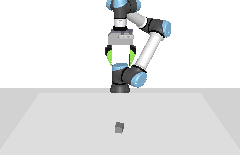

In [10]:
save_gif(images, 'grasp.gif', duration=25)

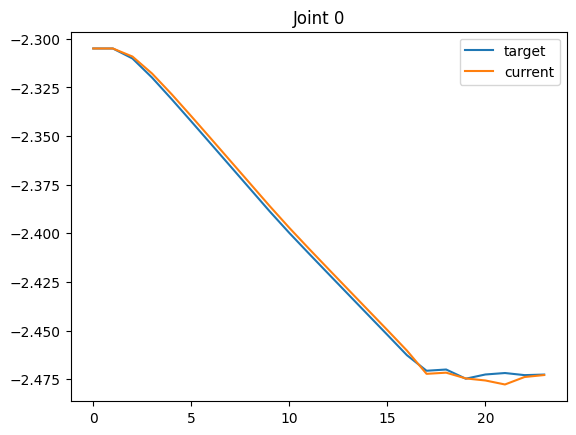

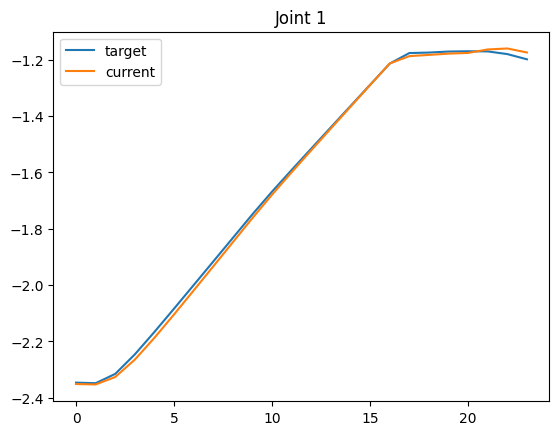

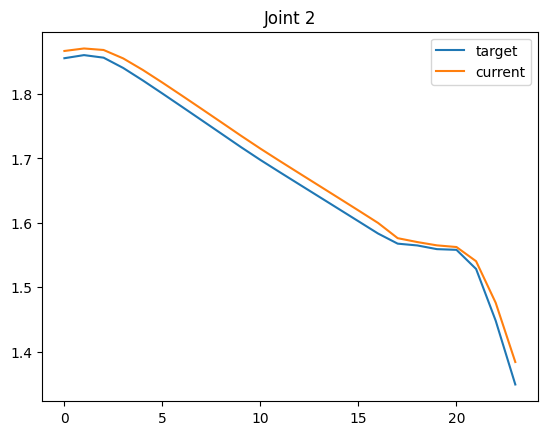

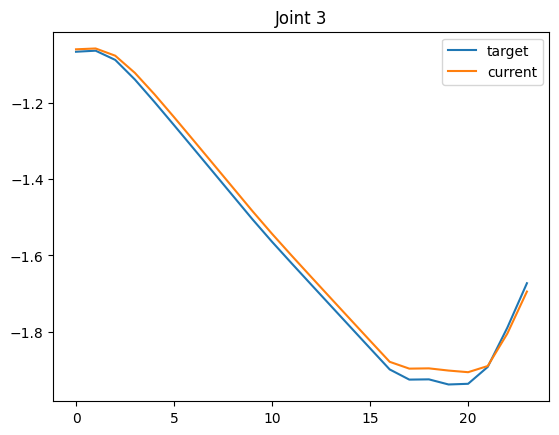

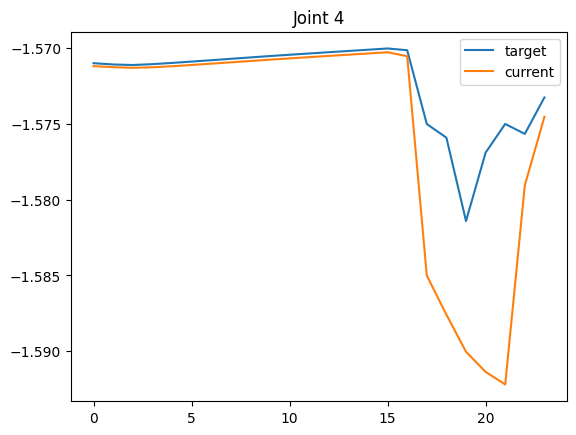

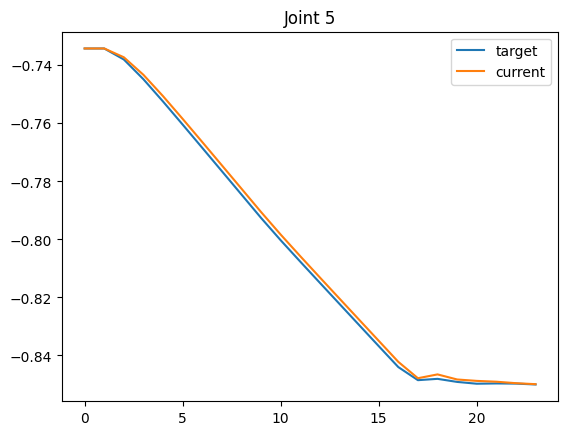

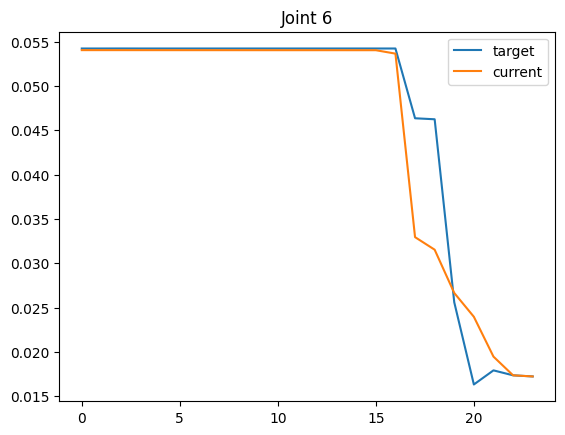

In [16]:
for i in range(7):
    plt.plot(target[:, i], label='target')
    plt.plot(current[:, i], label='current')
    plt.title(f'Joint {i}')
    plt.legend()
    plt.show()

## Cameras

rgb:top_down:160x240:2d


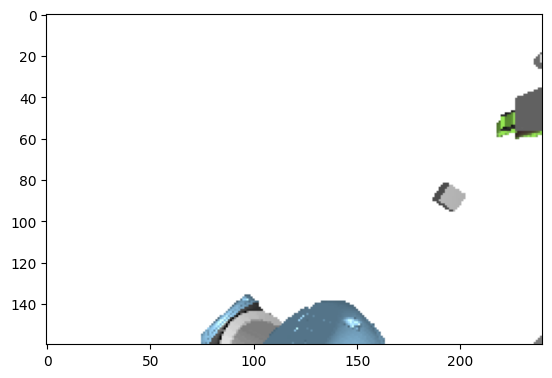

rgb:front:160x240:2d


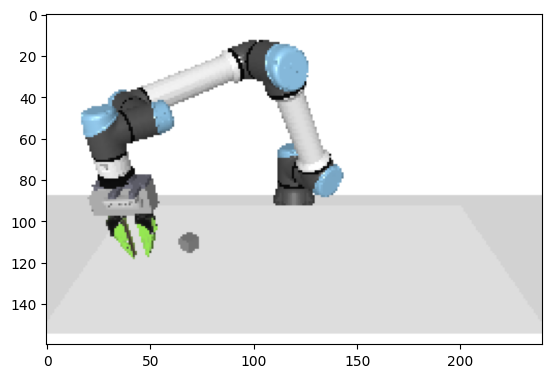

rgb:gripper:160x240:2d


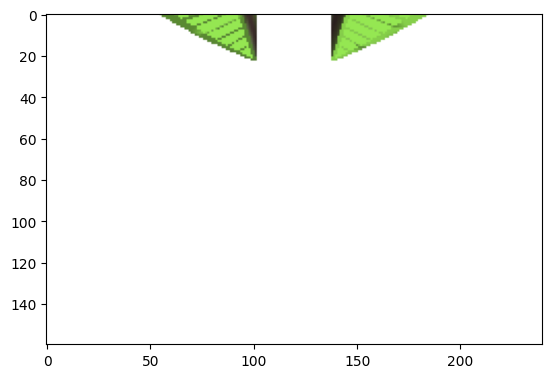

In [17]:
extero_dict = env.get_exteroception()
obs = env.get_obs(update_exteroception=True)
for key in env.visual_dict.keys():
    if key == 'time':
        continue
    print(key)
    plt.imshow(env.visual_dict[key])
    plt.show()